# Installing required libraries

In [2]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install opencv-python

In [4]:
!pip install sklearn

# Import required libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf   #tensorflow is a library which helps us to train and develop ML Models
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Store data, labels in the list

In [4]:
data = []   
labels = []    #folder name -> 0 to 42
classes = 43
current_path = os.getcwd()

In [5]:
current_path

'C:\\Users\\Inspiron-3000\\Traffic sign classification'

# Pre-process the images

In [6]:
for i in range(classes):     
    path = os.path.join(current_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30))   #(30, 30) is best for neural network feeding
            
            # Resizing all images into 30*30                                                 
            image = np.array(image)             
            data.append(image)      # in this step we have appended image into data list       
            labels.append(i)   # appended the i'th value 
        except Exception as e:
            print(e)

# Convert list into NumPy arrays

In [7]:
data = np.array(data) 
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


# Save labels and data for future use

In [9]:
# before saving data and labels we create folder of "training" name

np.save('./training/data', data)
np.save('./training/target', labels)

# Load data and labels

In [10]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [11]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Split Train and Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# convert labels to one-hot encoding

In [14]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

# Now its Time to build the model
## Model 1 - 4Conv2D layers

In [17]:
model = Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 

model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43in the dense 
model.add(Dense(43, activation='softmax'))

In [18]:
#Compilation of the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [19]:
epochs = 20 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 196s 200ms/step - loss: 2.1088 - accuracy: 0.4659 - val_loss: 0.6638 - val_accuracy: 0.8493
Epoch 2/20
981/981 [==============================] - 213s 217ms/step - loss: 0.7588 - accuracy: 0.7754 - val_loss: 0.2873 - val_accuracy: 0.9183
Epoch 3/20
981/981 [==============================] - 205s 209ms/step - loss: 0.5216 - accuracy: 0.8435 - val_loss: 0.2299 - val_accuracy: 0.9464
Epoch 4/20
981/981 [==============================] - 197s 201ms/step - loss: 0.4130 - accuracy: 0.8775 - val_loss: 0.1323 - val_accuracy: 0.9663
Epoch 5/20
981/981 [==============================] - 186s 189ms/step - loss: 0.3614 - accuracy: 0.8923 - val_loss: 0.1120 - val_accuracy: 0.9638
Epoch 6/20
981/981 [==============================] - 196s 199ms/step - loss: 0.3111 - accuracy: 0.9105 - val_loss: 0.1574 - val_accuracy: 0.9555
Epoch 7/20
981/981 [==============================] - 212s 216ms/step - loss: 0.2959 - accuracy: 0.9140 - val_loss: 0.0879 -

# model 2 - 2 Conv2D layers

In [23]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model2.add(MaxPool2D(pool_size=(2,2))) 
model2.add(Dropout(rate=0.25))

# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
# model.add(MaxPool2D(pool_size=(2,2))) 
# model.add(Dropout(rate=0.25)) 

model2.add(Flatten()) 
model2.add(Dense(256, activation='relu')) 
model2.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43in the dense 
model2.add(Dense(43, activation='softmax'))

In [24]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [25]:
epochs = 20 
history = model2.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 161s 164ms/step - loss: 3.8478 - accuracy: 0.0567 - val_loss: 3.4845 - val_accuracy: 0.0592
Epoch 2/20
981/981 [==============================] - 771s 786ms/step - loss: 3.4952 - accuracy: 0.0555 - val_loss: 3.4916 - val_accuracy: 0.0575
Epoch 3/20
981/981 [==============================] - 142s 145ms/step - loss: 3.4936 - accuracy: 0.0545 - val_loss: 3.4911 - val_accuracy: 0.0575
Epoch 4/20
981/981 [==============================] - 112s 114ms/step - loss: 3.4930 - accuracy: 0.0547 - val_loss: 3.4914 - val_accuracy: 0.0560
Epoch 5/20
981/981 [==============================] - 122s 124ms/step - loss: 3.4907 - accuracy: 0.0582 - val_loss: 3.4901 - val_accuracy: 0.0560
Epoch 6/20
981/981 [==============================] - 136s 138ms/step - loss: 3.4905 - accuracy: 0.0563 - val_loss: 3.4911 - val_accuracy: 0.0522
Epoch 7/20
981/981 [==============================] - 117s 120ms/step - loss: 3.4907 - accuracy: 0.0555 - val_loss: 3.4909 -

## Model 3 - 3 Conv2D layers

In [15]:
# Make model trunk
model3 = Sequential()

# Add first conv block
model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))   #reLu -> to bring non linearity in the model
model3.add(MaxPool2D(pool_size=(2,2)))                                 #reLu -> converts -ve values to 0 and speeds up training  
model3.add(Dropout(rate=0.25))

#conv + pooling gives locationinvarient feature detection

# Add second conv block
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
# model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model3.add(MaxPool2D(pool_size=(2,2)))  #maxpool2D -> reduces the size of the image it creates new feature array everytime 
# model2.add(Dropout(rate=0.25)) 

# Add FC layers
model3.add(Flatten())  #converts 2d to 1d
model3.add(Dense(256, activation='relu')) 
model3.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43in the dense 
model3.add(Dense(43, activation='softmax'))

In [16]:
# Compile model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fit the model
epochs = 20 
history3 = model3.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 87s 89ms/step - loss: 2.4468 - accuracy: 0.4239 - val_loss: 0.6653 - val_accuracy: 0.8275
Epoch 2/20
981/981 [==============================] - 91s 93ms/step - loss: 0.8010 - accuracy: 0.7501 - val_loss: 0.2864 - val_accuracy: 0.9317
Epoch 3/20
981/981 [==============================] - 90s 92ms/step - loss: 0.5060 - accuracy: 0.8444 - val_loss: 0.1491 - val_accuracy: 0.9644
Epoch 4/20
981/981 [==============================] - 89s 91ms/step - loss: 0.3567 - accuracy: 0.8933 - val_loss: 0.1060 - val_accuracy: 0.9758
Epoch 5/20
981/981 [==============================] - 89s 91ms/step - loss: 0.2778 - accuracy: 0.9198 - val_loss: 0.0841 - val_accuracy: 0.9756
Epoch 6/20
981/981 [==============================] - 90s 92ms/step - loss: 0.2244 - accuracy: 0.9326 - val_loss: 0.0633 - val_accuracy: 0.9814
Epoch 7/20
981/981 [==============================] - 91s 93ms/step - loss: 0.2045 - accuracy: 0.9426 - val_loss: 0.0611 - val_accuracy:

# Accuracy Graph

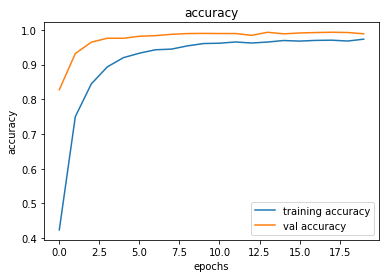

In [41]:
plt.figure(0)
plt.plot(history3.history['accuracy'], label = 'training accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss Graph

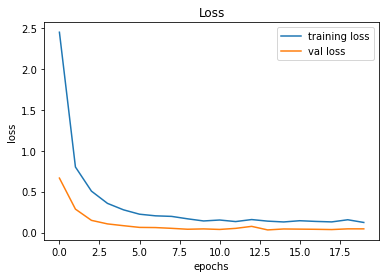

In [43]:
plt.plot(history3.history['loss'], label = 'training loss')
plt.plot(history3.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Lets do testing on test data

In [18]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test,label

In [20]:
X_test,label = testing('Test.csv')

In [22]:
Y_pred = model3.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ..., 25,  7, 10], dtype=int64)

# Accuracy with the test data

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.96215360253365


# Save the model

In [25]:
model3.save("./training/TSR.h5")

# Load the model

In [26]:
import os
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [27]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

# Text to speech converter

In [28]:
!pip install pyttsx3
import pyttsx3
text_speech = pyttsx3.init()

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    y_pred = model.predict_classes(X_test)
    return image,y_pred

Predicted traffic sign is  :  Keep right


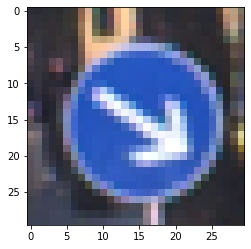

In [45]:
plot,prediction = test_on_img(r"C:\Users\Inspiron-3000\Traffic sign classification\Test\00514.png")
s = [str(i) for i in  prediction]
a = int("".join(s))
print("Predicted traffic sign is  : ", classes[a])

plt.imshow(plot)
plt.show()

text_speech.say(classes[a])
text_speech.runAndWait()